# Life Expectancy Project (Preprocessing file):

### import libarires:

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import skimpy 
from skimpy import skim
import ptitprince as pt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
import numpy as np
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("LE_Dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
strs=["Country", "Status"]
df=df.astype({i:"string" for i in strs})

In [7]:
df_copy= df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   string 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   string 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df_exclude=df.select_dtypes(exclude=["string"]) 

In [10]:
skew_res= df_exclude.skew()
skew_res

Year                               -0.006409
Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.786963
Alcohol                             0.589563
percentage expenditure              4.652051
Hepatitis B                        -1.930845
Measles                             9.441332
 BMI                               -0.219312
under-five deaths                   9.495065
Polio                              -2.098053
Total expenditure                   0.618686
Diphtheria                         -2.072753
 HIV/AIDS                           5.396112
GDP                                 3.206655
Population                         15.916236
 thinness  1-19 years               1.711471
 thinness 5-9 years                 1.777424
Income composition of resources    -1.143763
Schooling                          -0.602437
dtype: float64

In [11]:
lst= skew_res.tolist()
names= df_exclude.columns
names

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2938   │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 22     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year        │   0 │     0 │     2008 │    4.614 │  2000 │   2004 │    2008 │    2012 │       2015 │ ▇▅▇▅▇▇ │  │
│ │ Life        │  10 │  0.34 │    69.22 │    9.524 │  36.3 │   63.1 │    72.1 │    75.7 │         89 │  ▁▃▅▇▂ │  │
│ │ expectancy  │     │       │          │          │       │        │         │         │            │        │  │
│ │ Adult       │  10 │  0.34 │    164.8 │    124.3 │     1 │     74 │     144 │     228 │        723 │  ▇▇▃▁  │  │
│ │ Mortality   │     │       │          │          │       │        │         │         │            │        │  │
│ │ infant      │   0 │     0 │     30.3 │    117.9 │     0 │      0 │       3 │      22 │       1800 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Alcohol     │ 194 │   6.6 │    4.603 │    4.052 │  0.01 │ 0.8775 │   3.755 │   7.703 │      17.87 │ ▇▃▃▂▁  │  │
│ │ percentage  │   0 │     0 │    738.3 │     1988 │     0 │  4.685 │   64.91 │   441.5 │      19480 │   ▇    │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Hepatitis B │ 553 │ 18.82 │    80.94 │    25.07 │     1 │     77 │      92 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Measles     │   0 │     0 │     2420 │    11470 │     0 │      0 │      17 │   360.2 │     212200 │   ▇    │  │
│ │  BMI        │  34 │  1.16 │    38.32 │    20.04 │     1 │   19.3 │    43.5 │    56.2 │       87.3 │ ▃▆▃▇▃  │  │
│ │ under-five  │   0 │     0 │    42.04 │    160.4 │     0 │      0 │       4 │      28 │       2500 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Polio       │  19 │  0.65 │    82.55 │    23.43 │     3 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Total       │ 226 │  7.69 │    5.938 │    2.498 │  0.37 │   4.26 │   5.755 │   7.492 │       17.6 │  ▂▇▆▂  │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Diphtheria  │  19 │  0.65 │    82.32 │    23.72 │     2 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │  HIV/AIDS   │   0 │     0 │    1.742 │    5.078 │   0.1 │    0.1 │     0.1 │     0.8 │       50.6 │   ▇    │  │
│ │ GDP         │ 448 │ 15.25 │     7483 │    14270 │ 1.681 │  463.9 │    1767 │    5911 │     119200 │   ▇▁   │  │
│ │ Population  │ 652 │ 22.19 │ 12750000 │ 61010000 │   

In [13]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [15]:
for i, j in zip(names, lst):
    if j <0.5:
        df[i].fillna(df[i].mean(), inplace=True)
    else:
        # # For skewed columns
        df[i].fillna(df[i].median(), inplace=True)

        print(f'Filled missing values in {i} with median (skewed distribution)')

Filled missing values in Adult Mortality with median (skewed distribution)
Filled missing values in infant deaths with median (skewed distribution)
Filled missing values in Alcohol with median (skewed distribution)
Filled missing values in percentage expenditure with median (skewed distribution)
Filled missing values in Measles  with median (skewed distribution)
Filled missing values in under-five deaths  with median (skewed distribution)
Filled missing values in Total expenditure with median (skewed distribution)
Filled missing values in  HIV/AIDS with median (skewed distribution)
Filled missing values in GDP with median (skewed distribution)
Filled missing values in Population with median (skewed distribution)
Filled missing values in  thinness  1-19 years with median (skewed distribution)
Filled missing values in  thinness 5-9 years with median (skewed distribution)


In [16]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2938   │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 22     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year          │  0 │    0 │     2008 │    4.614 │  2000 │   2004 │    2008 │    2012 │       2015 │ ▇▅▇▅▇▇ │  │
│ │ Life          │  0 │    0 │    69.22 │    9.508 │  36.3 │   63.2 │      72 │    75.6 │         89 │  ▁▃▅▇▂ │  │
│ │ expectancy    │    │      │          │          │       │        │         │         │            │        │  │
│ │ Adult         │  0 │    0 │    164.7 │    124.1 │     1 │     74 │     144 │     227 │        723 │  ▇▇▃▁  │  │
│ │ Mortality     │    │      │          │          │       │        │         │         │            │        │  │
│ │ infant deaths │  0 │    0 │     30.3 │    117.9 │     0 │      0 │       3 │      22 │       1800 │   ▇    │  │
│ │ Alcohol       │  0 │    0 │    4.547 │    3.922 │  0.01 │  1.093 │   3.755 │    7.39 │      17.87 │ ▇▅▃▂▁  │  │
│ │ percentage    │  0 │    0 │    738.3 │     1988 │     0 │  4.685 │   64.91 │   441.5 │      19480 │   ▇    │  │
│ │ expenditure   │    │      │          │          │       │        │         │         │            │        │  │
│ │ Hepatitis B   │  0 │    0 │    80.94 │    22.59 │     1 │  80.94 │      87 │      96 │         99 │ ▁  ▁▅▇ │  │
│ │ Measles       │  0 │    0 │     2420 │    11470 │     0 │      0 │      17 │   360.2 │     212200 │   ▇    │  │
│ │  BMI          │  0 │    0 │    38.32 │    19.93 │     1 │   19.4 │      43 │    56.1 │       87.3 │ ▃▆▃▇▃  │  │
│ │ under-five    │  0 │    0 │    42.04 │    160.4 │     0 │      0 │       4 │      28 │       2500 │   ▇    │  │
│ │ deaths        │    │      │          │          │       │        │         │         │            │        │  │
│ │ Polio         │  0 │    0 │    82.55 │    23.35 │     3 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Total         │  0 │    0 │    5.924 │    2.401 │  0.37 │   4.37 │   5.755 │    7.33 │       17.6 │  ▂▇▅▁  │  │
│ │ expenditure   │    │      │          │          │       │        │         │         │            │        │  │
│ │ Diphtheria    │  0 │    0 │    82.32 │    23.64 │     2 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │  HIV/AIDS     │  0 │    0 │    1.742 │    5.078 │   0.1 │    0.1 │     0.1 │     0.8 │       50.6 │   ▇    │  │
│ │ GDP           │  0 │    0 │     6612 │    13300 │ 1.681 │  580.5 │    1767 │    4779 │     119200 │   ▇    │  │
│ │ Population    │  0 │    0 │ 10230000 │ 54020000 │    34 │ 418900 │ 1387000 │ 4584000 │ 1294000000 │   ▇    │  │
│ │  thinness     │  0 │    0 │    4.822 │    4.398 │   

In [17]:
ptr = PowerTransformer(method='yeo-johnson')
skewed_columns = df_exclude.columns[df_exclude.skew().abs() > 0.5]  # Adjust threshold based on your needs

df[skewed_columns] = ptr.fit_transform(df[skewed_columns])

In [18]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,-0.576420,0.885122,1.362256,-1.531072,0.086606,-1.214602,1.158600,...,-2.300608,0.948144,-1.277308,-0.700818,-0.654395,1.608726,1.874871,1.874038,-0.911501,-0.657449
1,Afghanistan,2014,Developing,-1.046283,0.931424,1.373597,-1.531072,0.097872,-1.349144,0.969631,...,-1.560931,0.955409,-1.401735,-0.700818,-0.627653,-0.613305,1.895056,1.887656,-0.924137,-0.687005
2,Afghanistan,2013,Developing,-1.046283,0.914155,1.384513,-1.531072,0.096364,-1.260650,0.938081,...,-1.410522,0.937232,-1.319960,-0.700818,-0.610405,1.573888,1.908314,1.901117,-0.949189,-0.716420
3,Afghanistan,2012,Developing,-1.080168,0.937156,1.400153,-1.531072,0.120241,-1.118837,1.335747,...,-1.196558,1.077802,-1.188403,-0.700818,-0.577272,0.449801,1.921418,1.921020,-0.978048,-0.745695
4,Afghanistan,2011,Developing,-1.105307,0.954277,1.410125,-1.531072,-0.706063,-1.069093,1.350573,...,-1.150156,0.841950,-1.142119,-0.700818,-1.857149,0.346773,1.940791,1.934102,-1.014577,-0.832669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,-2.079574,2.817025,1.036375,0.237586,-1.438247,-1.069093,0.221622,...,-1.196558,0.563347,-1.277308,1.915430,-0.795225,1.075488,1.164173,1.150500,-1.195085,-0.918352
2934,Zimbabwe,2003,Developing,-2.069771,2.791035,1.020230,0.163795,-1.438247,-2.341520,1.127680,...,-2.299771,0.324618,-1.142119,1.915979,-0.796473,1.069511,1.213332,1.211802,-1.154352,-0.832669
2935,Zimbabwe,2002,Developing,-2.054914,-0.637514,1.003328,0.254353,-1.438247,-0.801239,0.854639,...,-0.899302,0.328603,-0.995765,1.916410,-1.910316,-0.982287,-1.024559,-0.939254,-1.120345,-0.687005
2936,Zimbabwe,2001,Developing,-2.029741,2.695370,1.003328,-0.568967,-1.438247,-0.624747,0.986420,...,-0.733189,0.179455,-0.782569,1.916673,-0.689783,1.058200,-0.772941,-0.705751,-1.120345,-0.745695


In [19]:
names

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
label_encoder = LabelEncoder()
df['Country_Encoded'] = label_encoder.fit_transform(df['Country'])
df['Status_Encoded'] = label_encoder.fit_transform(df['Status'])

In [21]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Encoded,Status_Encoded
0,Afghanistan,2015,Developing,-0.576420,0.885122,1.362256,-1.531072,0.086606,-1.214602,1.158600,...,-1.277308,-0.700818,-0.654395,1.608726,1.874871,1.874038,-0.911501,-0.657449,0,1
1,Afghanistan,2014,Developing,-1.046283,0.931424,1.373597,-1.531072,0.097872,-1.349144,0.969631,...,-1.401735,-0.700818,-0.627653,-0.613305,1.895056,1.887656,-0.924137,-0.687005,0,1
2,Afghanistan,2013,Developing,-1.046283,0.914155,1.384513,-1.531072,0.096364,-1.260650,0.938081,...,-1.319960,-0.700818,-0.610405,1.573888,1.908314,1.901117,-0.949189,-0.716420,0,1
3,Afghanistan,2012,Developing,-1.080168,0.937156,1.400153,-1.531072,0.120241,-1.118837,1.335747,...,-1.188403,-0.700818,-0.577272,0.449801,1.921418,1.921020,-0.978048,-0.745695,0,1
4,Afghanistan,2011,Developing,-1.105307,0.954277,1.410125,-1.531072,-0.706063,-1.069093,1.350573,...,-1.142119,-0.700818,-1.857149,0.346773,1.940791,1.934102,-1.014577,-0.832669,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,-2.079574,2.817025,1.036375,0.237586,-1.438247,-1.069093,0.221622,...,-1.277308,1.915430,-0.795225,1.075488,1.164173,1.150500,-1.195085,-0.918352,192,1
2934,Zimbabwe,2003,Developing,-2.069771,2.791035,1.020230,0.163795,-1.438247,-2.341520,1.127680,...,-1.142119,1.915979,-0.796473,1.069511,1.213332,1.211802,-1.154352,-0.832669,192,1
2935,Zimbabwe,2002,Developing,-2.054914,-0.637514,1.003328,0.254353,-1.438247,-0.801239,0.854639,...,-0.995765,1.916410,-1.910316,-0.982287,-1.024559,-0.939254,-1.120345,-0.687005,192,1
2936,Zimbabwe,2001,Developing,-2.029741,2.695370,1.003328,-0.568967,-1.438247,-0.624747,0.986420,...,-0.782569,1.916673,-0.689783,1.058200,-0.772941,-0.705751,-1.120345,-0.745695,192,1


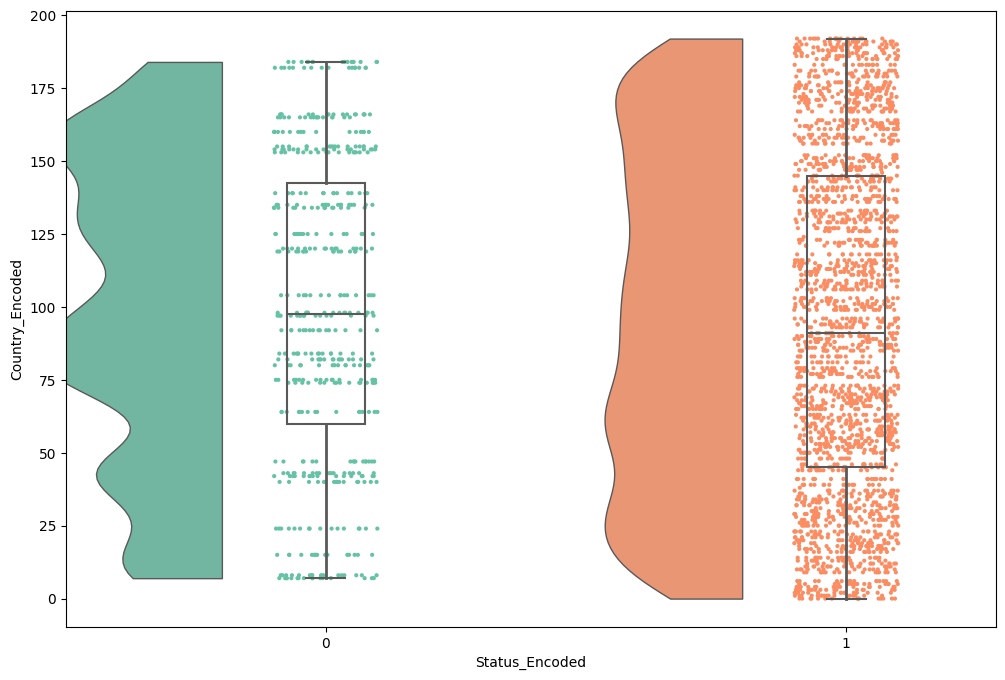

In [22]:
# Adjust figure size
plt.figure(figsize=(12, 8))

pt.RainCloud(x="Status_Encoded",y="Country_Encoded", data=df,  width_viol=0.7, bw=0.2)

plt.show();

In [23]:
del df["Country"], df["Status"]

In [24]:
corr_matrix = df.corr()
corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Encoded,Status_Encoded
Year,1.000000,0.164434,-0.052926,-0.050909,-0.074130,-0.065163,0.145563,-0.095836,0.108327,-0.050772,...,0.146942,-0.075770,0.155365,0.042798,-0.036096,-0.036076,0.210151,0.196163,0.001342,0.001864
Life expectancy,0.164434,1.000000,-0.588289,-0.600089,0.400660,0.406583,0.275173,-0.284784,0.555855,-0.620051,...,0.564160,-0.773081,0.585101,-0.086193,-0.576518,-0.584490,0.795172,0.752414,-0.020283,-0.533407
Adult Mortality,-0.052926,-0.588289,1.000000,0.357610,-0.164758,-0.257470,-0.161967,0.144840,-0.346228,0.371869,...,-0.301994,0.507173,-0.325255,0.079355,0.329280,0.342676,-0.453234,-0.410645,0.037973,0.311135
infant deaths,-0.050909,-0.600089,0.357610,1.000000,-0.370446,-0.348124,-0.287658,0.577419,-0.471623,0.994588,...,-0.424241,0.472263,-0.461401,0.407070,0.463052,0.473827,-0.522397,-0.551989,0.041475,0.385601
Alcohol,-0.074130,0.400660,-0.164758,-0.370446,1.000000,0.256537,0.092797,-0.207851,0.296495,-0.369800,...,0.265970,-0.165900,0.369764,-0.015465,-0.447053,-0.441513,0.452455,0.496830,-0.049231,-0.508495
percentage expenditure,-0.065163,0.406583,-0.257470,-0.348124,0.256537,1.000000,0.074261,-0.140330,0.257567,-0.351122,...,0.220966,-0.226199,0.613029,-0.045207,-0.285982,-0.289760,0.454030,0.427671,-0.108485,-0.314472
Hepatitis B,0.145563,0.275173,-0.161967,-0.287658,0.092797,0.074261,1.000000,-0.223879,0.184403,-0.287827,...,0.639836,-0.273857,0.171112,-0.081327,-0.056019,-0.064717,0.242843,0.244849,-0.031171,-0.093975
Measles,-0.095836,-0.284784,0.144840,0.577419,-0.207851,-0.140330,-0.223879,1.000000,-0.299353,0.578533,...,-0.283931,0.230121,-0.185156,0.264307,0.319125,0.327892,-0.205639,-0.259377,0.060378,0.046452
BMI,0.108327,0.555855,-0.346228,-0.471623,0.296495,0.257567,0.184403,-0.299353,1.000000,-0.485291,...,0.340269,-0.502134,0.412655,-0.066044,-0.557785,-0.568341,0.533152,0.524265,0.017724,-0.310873
under-five deaths,-0.050772,-0.620051,0.371869,0.994588,-0.369800,-0.351122,-0.287827,0.578533,-0.485291,1.000000,...,-0.432237,0.499639,-0.468617,0.401366,0.471361,0.481466,-0.534309,-0.564370,0.034855,0.384276


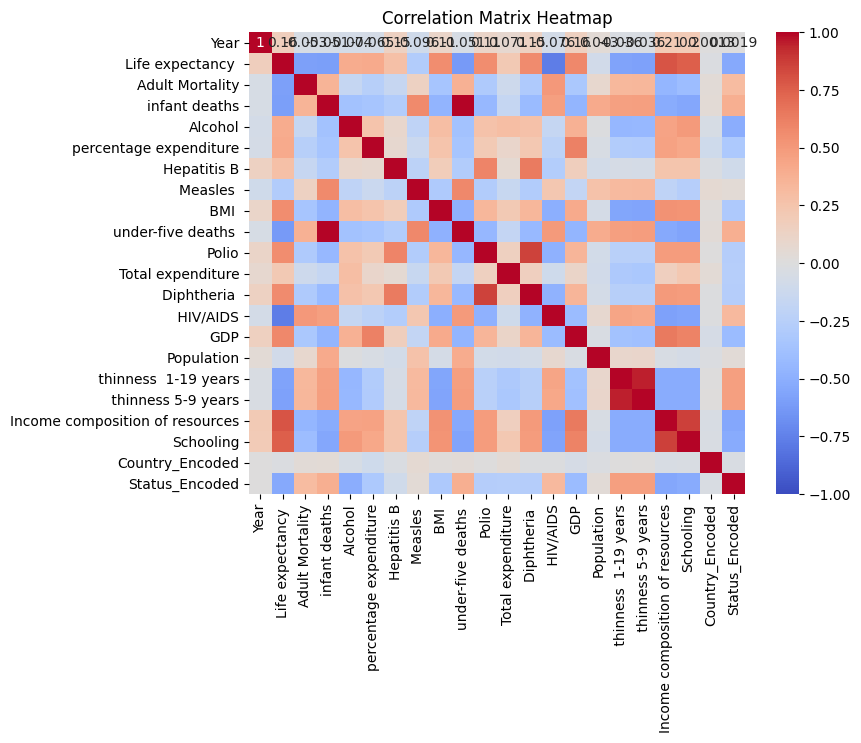

In [25]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

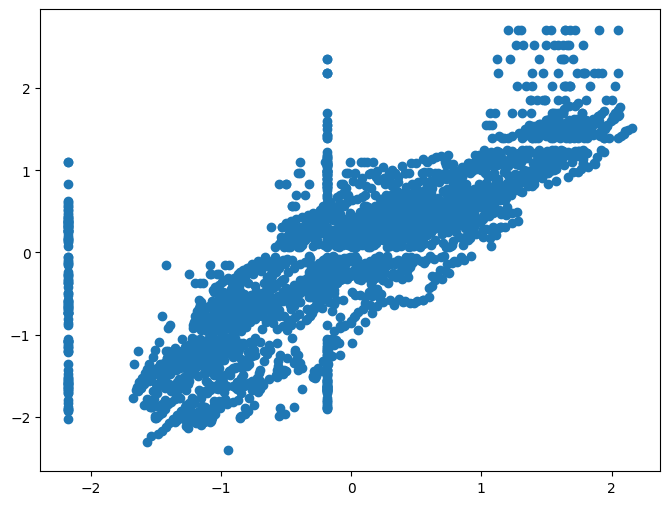

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(x="Income composition of resources", y="Life expectancy ", data=df)

plt.show();


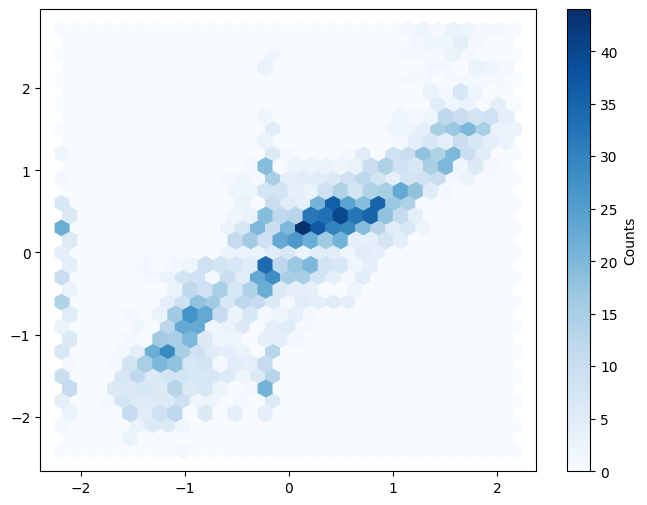

In [27]:
plt.figure(figsize=(8, 6))
# Create the hexbin plot
plt.hexbin(x=df["Income composition of resources"], y=df["Life expectancy "], gridsize=30, cmap='Blues')

# Add color bar to show the density scale
plt.colorbar(label='Counts')

# Show the plot
plt.show()

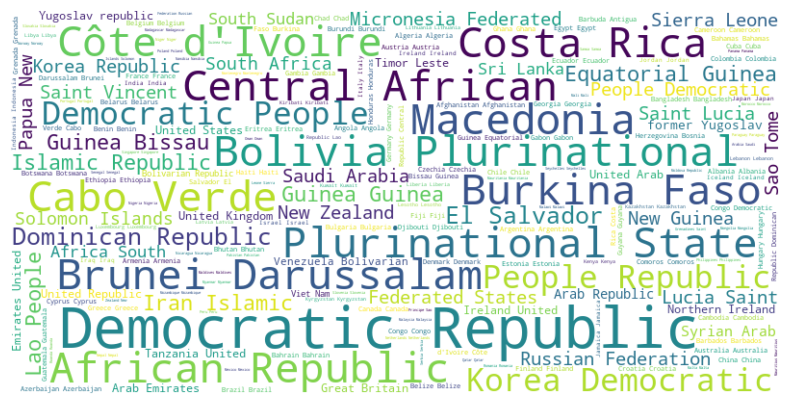

In [28]:
text = ' '.join(df_copy['Country'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()